In [5]:
import numpy as np
import statsmodels.api as sm
import pylab
from matplotlib.pyplot import hist
import scipy.stats as stats
import math

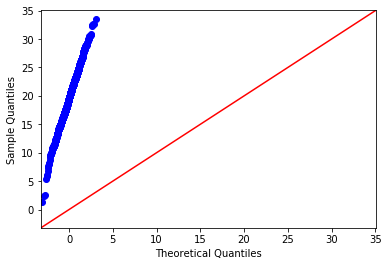

In [2]:
test = np.random.normal(20,5,1000)

sm.qqplot(test,loc=20,scale=5,line='45')
pylab.show()

## Question 1: Why does the distribution not align with the line y=x

* First lets note that the line plot is still of the form y=mx+c
* First, lets check the histogram

(array([  3.,   0.,   3.,   3.,   5.,  20.,  38.,  46.,  90., 126., 124.,
        115., 128., 114.,  70.,  56.,  25.,  23.,   6.,   5.]),
 array([ 1.37692777,  2.98054638,  4.58416499,  6.18778361,  7.79140222,
         9.39502083, 10.99863944, 12.60225805, 14.20587666, 15.80949528,
        17.41311389, 19.0167325 , 20.62035111, 22.22396972, 23.82758833,
        25.43120695, 27.03482556, 28.63844417, 30.24206278, 31.84568139,
        33.4493    ]),
 <a list of 20 Patch objects>)

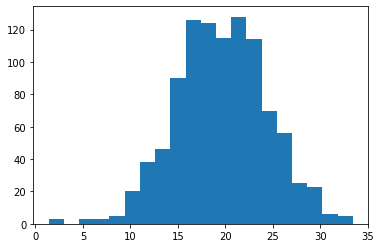

In [3]:
hist(test,20)

This shows a normal distribution with a mode/mean of 20

Also lets plot the same graph without the scale and location parameters.

The plot as shown below shows that the line is of the form:
y = 5+20x
where std=5 and mean=20

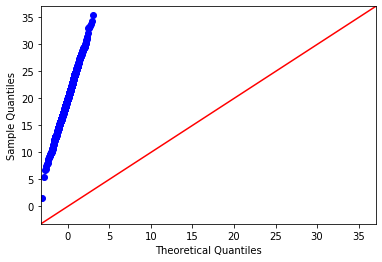

In [4]:
test2 = np.random.normal(20,5,1000)

sm.qqplot(test2,line='45')
pylab.show()

If we create a new distribution with mean=0 and std=1, we get the following distribution

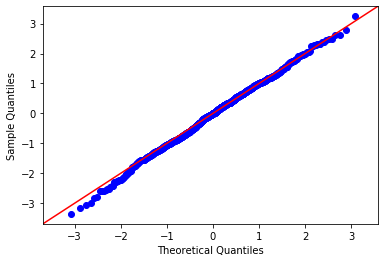

In [5]:
test2 = np.random.normal(0,1,1000)

sm.qqplot(test2,line='45')
pylab.show()

Which is what we would expect from a 0 mean unit variance distribution

## Question 2: Standard Error of the mean

The standard error of the mean measures the dispersion of the sample means around the population mean

The formula for standard error is given by:

**error = std(samples)/sqrt(sample_size)**

The following function simulates the sample mean error and the next 3 cells show how the errors reduce
when the sample size in increased

In [11]:
def get_sampled_means(num_observations, pop_mean,pop_std, sample_size):
    means = []
    for simulation in range(num_observations):
        samples = np.random.normal(pop_mean,pop_std,sample_size)
        means.append(np.mean(samples))
    return means

In [35]:
n = 1000
sample_size = 10000
pop_mean = 10
pop_std = 5
means = get_sampled_means(n, pop_mean,pop_std,sample_size)

(array([  2.,  10.,   7.,  20.,  45.,  46.,  54.,  90., 126., 128., 124.,
        106.,  90.,  61.,  36.,  24.,  16.,  13.,   0.,   2.]),
 array([ 9.85051714,  9.86600851,  9.88149988,  9.89699125,  9.91248261,
         9.92797398,  9.94346535,  9.95895672,  9.97444809,  9.98993945,
        10.00543082, 10.02092219, 10.03641356, 10.05190493, 10.0673963 ,
        10.08288766, 10.09837903, 10.1138704 , 10.12936177, 10.14485314,
        10.1603445 ]),
 <a list of 20 Patch objects>)

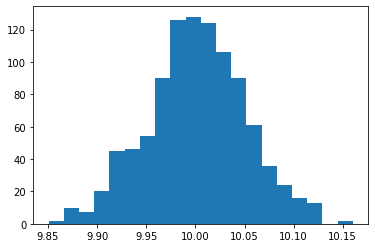

In [36]:
hist(means,20)

In [37]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

### When using 1000 samples

In [38]:
lower, higher = mean_confidence_interval(means, confidence=0.95)
lower,higher

(9.998942427080163, 10.005181387237197)

With this we are confident that 95% of our samples are within the range (9.998942427080163, 10.005181387237197)

### When using 10 samples

In [39]:
sample_size = 10
means = get_sampled_means(n, pop_mean,pop_std,sample_size)
lower, higher = mean_confidence_interval(means, confidence=0.95)
lower,higher

(9.851993540107825, 10.04433094515066)

With this we are confident that 95% of our samples are within the range (9.851993540107825, 10.04433094515066)